<a href="https://colab.research.google.com/github/rcurrie/notebooks/blob/master/braingeneers/2018-12-11-mea-ucsf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Explore MEA Data from 2018-12-11 Experiment @ UCSF

_1 & 2: Baseline recordings made w/o organoid but with media (brain serum). Then organoid added and recordings made with various filter settings on the MEA board._

_3 & 4: Recordings start with organoid in place. Then KCl was added via pipette. Recording continued through addition and after._

_All: 16 outputs, 4 of which were not touching_

In [0]:
import os
import pprint
import requests
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

In [0]:
# Set default plot size - must be in separate cell:
# https://github.com/ipython/ipython/issues/11098
plt.rcParams['figure.figsize'] = [15.0, 5.0]

In [0]:
base_url = "https://s3.nautilus.optiputer.net/braingeneers/archive/derived/2018-12-11"

def load_experiment(path):
    """ 
    Load signal and metadata stored in S3 via the ingest notebook. 
    Returns:
    X = signal vector of microvolt time series readings, one for each of the channels
    t = time in milliseconds for each reading (for conveniance, all samples at fs)
    fs = sample rate
    metadata = all of the metadata associated with this experiment
    """
    metadata = requests.get("{}/{}.json".format(base_url, path)).json()
    fs = metadata["frequency_parameters"]["amplifier_sample_rate"]
    with np.DataSource(None).open("{}/{}.npy".format(base_url, path), "rb") as f:
        X = np.load(f)
    # Convert from 16 bit unsigned int to signed floating point microvolts array as per Intam sample code
    X = np.multiply(0.195, (X.astype(np.int32) - 32768))

    t = np.linspace(0, 1000 * X.shape[1] / fs, X.shape[1])   
    return X, t, fs, metadata

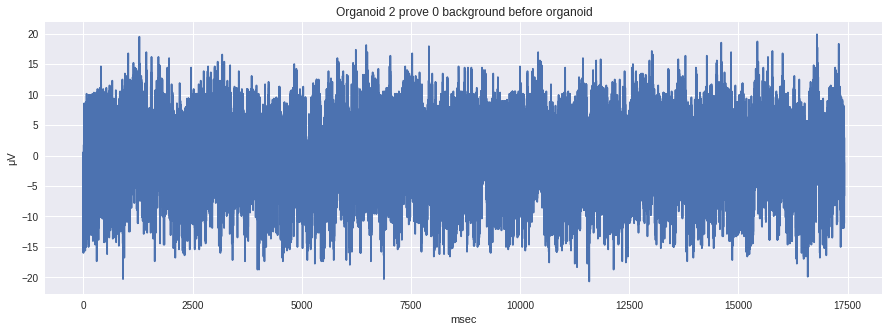

In [4]:
X, t, fs, metadata = load_experiment("organoid-2-recording_background-before-organoid-2_181208_130214")
plt.plot(t, X[0])
plt.title("Organoid 2 prove 0 background before organoid")
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()

The baseline signal is < 20 μV so significantly below the output of a neuron

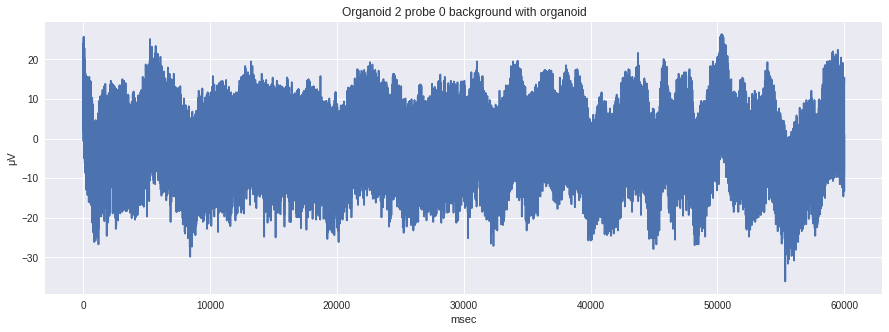

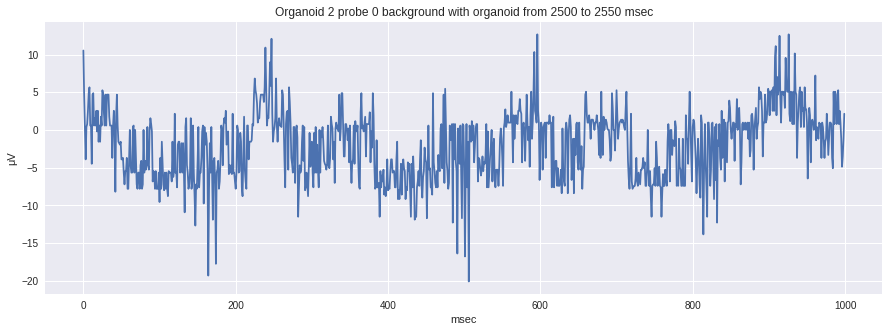

In [5]:
X, t, fs, metadata = load_experiment("organoid-2-recording_3-wt_low-freq-noise_2_181208_140551")
plt.plot(t, X[0])
plt.title("Organoid 2 probe 0 background with organoid")
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()

start = 50000
end = start + 1000
plt.plot(X[0][start:end])
plt.title("Organoid 2 probe 0 background with organoid from {} to {} msec".format(int(t[start]), int(t[end])))
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()

Low frequency plus some high frequency with the organoid but still < 20μV

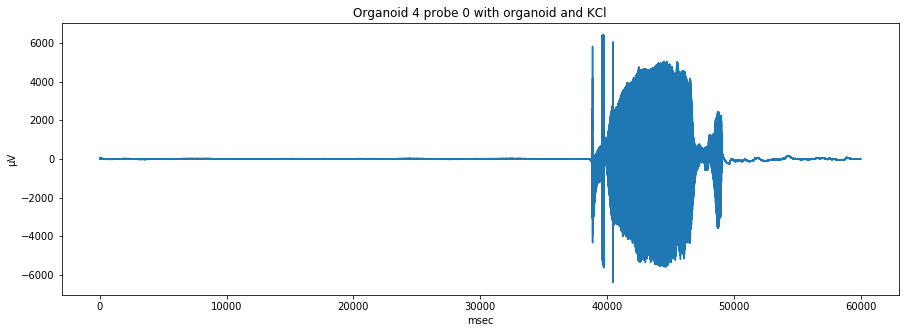

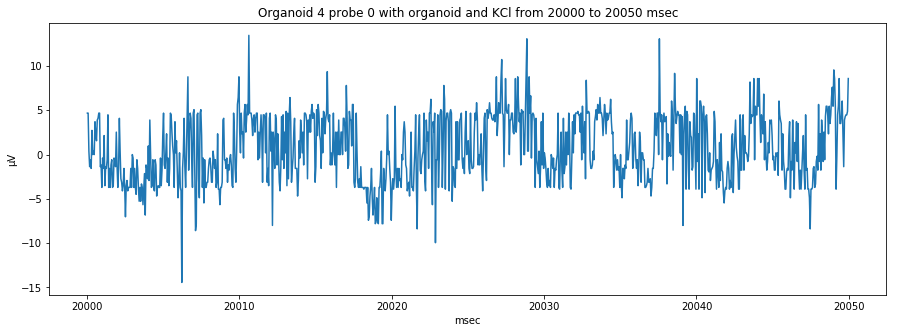

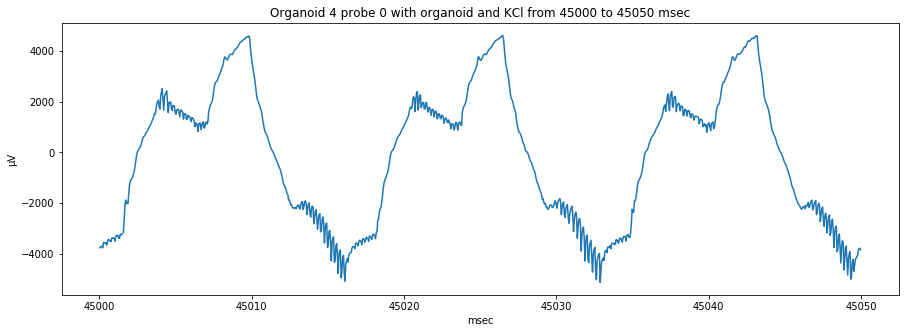

In [73]:
X, t, fs, metadata = load_experiment("organoid-4-recording_4_wt-40mM-KCl_181208_143257")

plt.plot(t, X[0])
plt.title("Organoid 4 probe 0 with organoid and KCl")
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()

start = 400000
end = start + 1000
plt.plot(t[start:end], X[0][start:end])
plt.title("Organoid 4 probe 0 with organoid and KCl from {} to {} msec".format(int(t[start]), int(t[end])))
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()

start = 900000
end = start + 1000
plt.plot(t[start:end], X[0][start:end])
plt.title("Organoid 4 probe 0 with organoid and KCl from {} to {} msec".format(int(t[start]), int(t[end])))
plt.xlabel("msec")
plt.ylabel("μV")
plt.show()